Probability Mass Functions

can describe discrete outcomes of a distribution

In [1]:
from empiricaldist import Pmf

In [6]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [7]:
die = Pmf.from_seq([1, 2, 3, 4, 5, 6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [8]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [9]:
letters['s']

0.36363636363636365

In [10]:
letters('s')

0.36363636363636365

In [11]:
letters['t']

KeyError: 't'

In [12]:
letters('t')

0

In [14]:
letters(['s', 'i', 't'])

array([0.36363636, 0.36363636, 0.        ])

In [18]:
letters['s', 'i']

KeyError: 'key of type tuple not found and not a MultiIndex'

In [21]:
prior = Pmf.from_seq(['b1', 'b2'])

In [22]:
prior

,probs
b1,0.5
b2,0.5


In [23]:
# rehash of cookie problem
lv = [0.75, 0.5] # lv = likelihood of a vanilla cookie

In [45]:
unnorm = prior * lv # unnormalized posterior just equals the prior times the likelihood
unnorm 

,probs
b1,0.375
b2,0.250


In [46]:
prob_data = unnorm.sum() 

In [47]:
prob_data

0.625

In [48]:
unnorm = unnorm / prob_data
unnorm

,probs
b1,0.6
b2,0.4


In [50]:
unnorm = prior * lv # unnormalized posterior just equals the prior times the likelihood
unnorm 

,probs
b1,0.375
b2,0.250


In [51]:
posterior = unnorm.normalize() # returns total probability of data just like unnorm.sum() 
posterior

0.625

In [52]:
unnorm # but .normalize() also updates the value on the table
       # to the normalized posterior at the same time, so we
       # now have the posterior distribution

,probs
b1,0.6
b2,0.4


In [53]:
posterior = unnorm
posterior

In [55]:
posterior('b1')

0.6

In [56]:
posterior *= lv # simulates the updated posterior after returning the cookie and drawing again from same bowl

In [57]:
posterior

,probs
b1,0.45
b2,0.20


In [58]:
posterior.normalize()
posterior

,probs
b1,0.692308
b2,0.307692


In [59]:
lc = [0.25, 0.5] # similarly, a posterior update for replacement from a chocolate cookie
posterior *= lc
posterior.normalize()
posterior

,probs
b1,0.529412
b2,0.470588


another scenario:
101 bowls with progressively more vanilla cookies starting at 0% vanilla and moving up to 99% vanilla, one bowl at a time

In [2]:
import numpy as np
hypos = np.arange(101)

In [3]:
prior = Pmf(1, hypos)
prior

,probs
0,1
1,1
2,1
3,1
4,1
...,...
96,1
97,1
98,1
99,1


In [4]:
prior.normalize()

101

In [5]:
lv = hypos/100

In [6]:
lv[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [7]:
posterior1 = prior * lv

In [8]:
posterior1.normalize()
posterior1

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604


In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

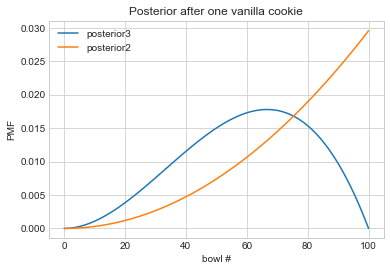

In [29]:
fig = plt.figure()
ax = plt.axes()

ax.plot(posterior3, label= post_labels[2])
ax.plot(posterior2, label= pri_labels[2])

plt.title('Posterior after one vanilla cookie')
ax.set_xlabel('bowl #')
ax.set_ylabel('PMF')
plt.legend();

In [30]:
def plot_posteriors(posteriors, priors, iterations):
    for i in range(iterations):
        fig = plt.figure()
        ax = plt.axes()

        ax.plot(posteriors[i], label= post_labels[i])
        ax.plot(priors[i], label= pri_labels[i])

        plt.title(f'Posterior after {i + 1} vanilla cookie(s)')
        ax.set_xlabel('bowl #')
        ax.set_ylabel('PMF')
        plt.legend();

In [25]:
posterior2 = posterior1 * lv
posterior2.normalize()
lc = 1 - hypos/100
posterior3 = posterior2 * lc
posterior3.normalize()

0.2462686567164179

In [21]:
posteriors = [posterior1, posterior2, posterior3]
post_labels = ['posterior1', 'posterior2', 'posterior3']
priors = [prior, posterior1, posterior2]
pri_labels = ['prior', 'posterior1', 'posterior2']

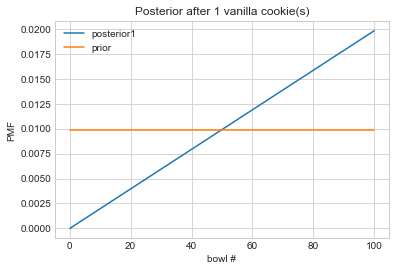

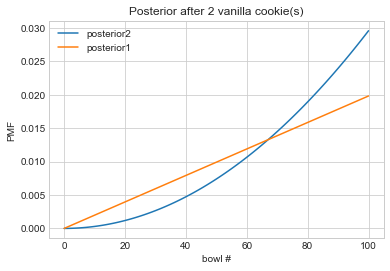

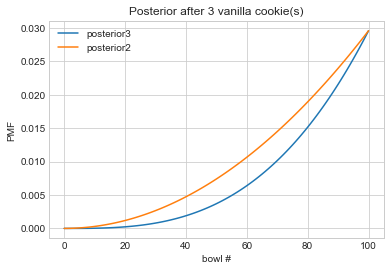

In [31]:
plot_posteriors(posteriors, priors, len(posteriors))

MAP (maximum a posteori probability) = highest posterior probability in the distribution

In [34]:
posterior3.idxmax(), posterior3.max_prob()

(67, 67)

In [35]:
hypos = [6, 8, 12]

In [56]:
prior = Pmf(1/3, hypos)

In [38]:
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [39]:
prior.qs

array([ 6,  8, 12])

In [40]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

In [41]:
likelihood1 = 1/6, 1/8, 1/12

In [42]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [43]:
likelihood2 = 0, 1/8, 1/12

In [44]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


In [47]:
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1/hypos
    zero = data > hypos
    likelihood[zero] = 0
    pmf *= likelihood
    pmf.normalize()

In [63]:
update_dice(prior, 7)

In [64]:
prior

,probs
6,0.000000
8,0.835052
12,0.164948


In [66]:
hypos = [6, 8, 12]

In [67]:
prior = Pmf(1/3, hypos)

In [68]:
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [69]:
rolls = [1, 3, 5, 7]

In [70]:
for i in range(4):
    update_dice(prior, rolls[i])
prior

,probs
6,0.000000
8,0.835052
12,0.164948


In [76]:
hypos = [4, 6, 6, 8, 8, 8, 12, 12, 12, 12, 20, 20, 20, 20, 20]
prior = Pmf([1/4, 1/6, 1/6, 1/8, 1/8, 1/8, 1/12, 1/12, 1/12, 1/12, 1/20, 1/20, 1/20, 1/20, 1/20], hypos)

In [78]:
hypos = [4, 6, 8, 12, 20]
prior = Pmf([1/4, 2/6, 3/8, 4/12, 5/20], hypos)

In [79]:
update_dice(prior, 7)
prior

,probs
4,0.000000
6,0.000000
8,0.537849
12,0.318725
20,0.143426


In [74]:
18*3 + 8*4 + 3*5

101